# PROJET : Anticiper les besoins en consommation électrique de bâtiments

**Autor** : Louis BIRENHOLZ   
**Date** : 12/03/2020  
**Durée totale (3 notebooks)** : 100 heures  
**Vidéo du projet :** https://www.youtube.com/watch?v=GRcUu2_YbFE&feature=emb_title

## Partie 2 : Exploration & Data Viz

Ce 2ème notebook réalise des **visualisations** et une **OHE** des **variables catégorielles** pour préparer le dataset.

### Librairies

In [1]:
# Classic lib.
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import pearsonr

# Viz lib.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import sklearn
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

### Settings

In [2]:
# Style.
plt.style.use('ggplot')
sns.set_style("darkgrid")

# Options.
pd.options.display.max_columns = 50
pd.options.display.max_rows = 10

### Data

In [3]:
df = pd.read_csv("df_tot.csv", sep='\t')

### Check NaN

In [4]:
df.drop(['Unnamed: 0'],axis = 1, inplace = True)

df_NaN = pd.DataFrame((df.notnull().sum() /df.shape[0])*100).sort_index(axis = 0,by=0)
df_NaN.columns = ['% de données dispo']

C:\Users\Louis\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


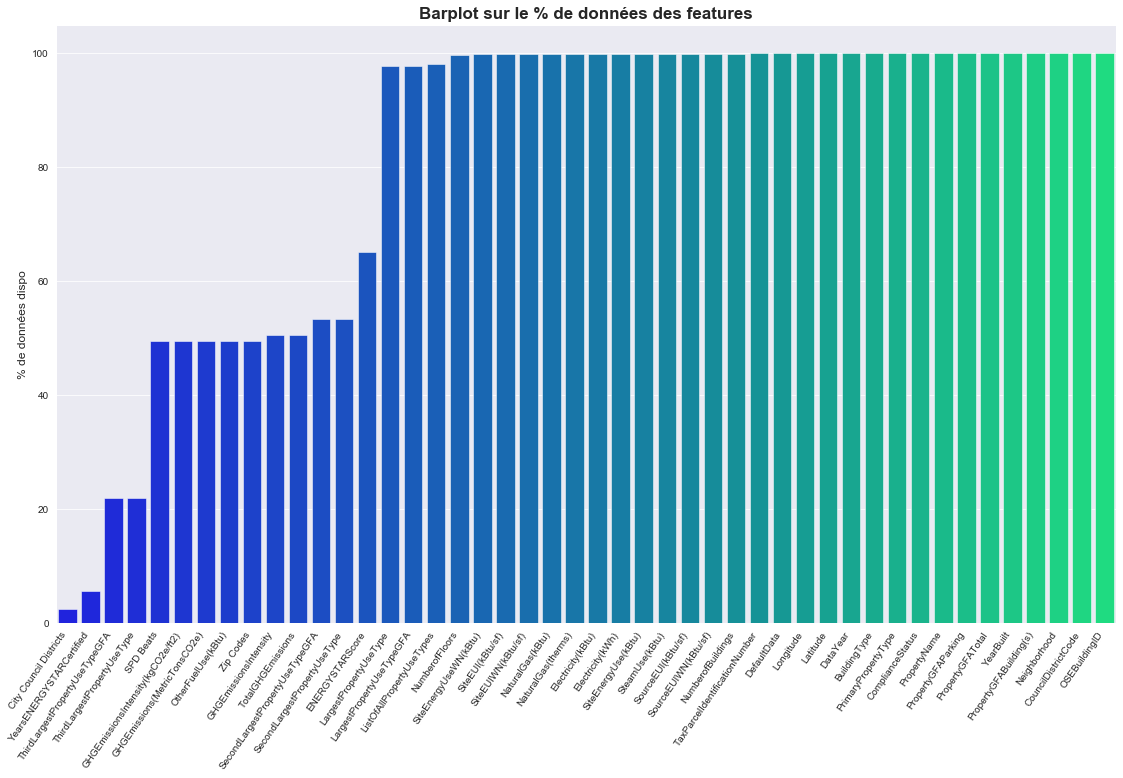

In [5]:
fig=plt.figure(figsize=(19,11))
plt.xticks(rotation='55',ha='right')
plt.title("Barplot sur le % de données des features", weight = 'bold',size=17)
sns.barplot(x=df_NaN.index, y="% de données dispo", data=df_NaN, palette = 'winter')

In [6]:
# Delete features with too many NaN.

for i,j in zip(df.columns,df.notnull().sum()):
    if (j<df.shape[0]*0.2):
        df.drop(i,axis = 1, inplace = True)

## Exploration

###   Data Visualization

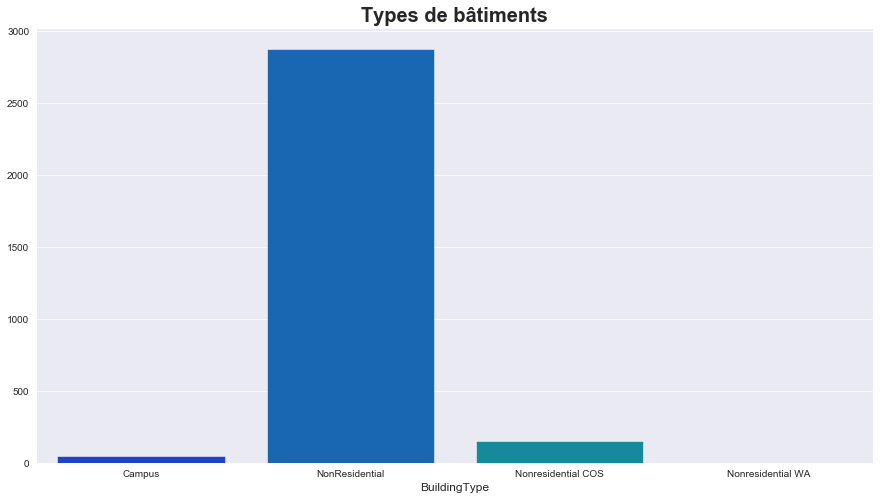

In [32]:
fig=plt.figure(figsize=(15,8))
plt.title("Types de bâtiments", weight = 'bold',size = 20)
sns.barplot(x=df.groupby('BuildingType').size().index, y=df.groupby('BuildingType').size(), palette = 'winter')

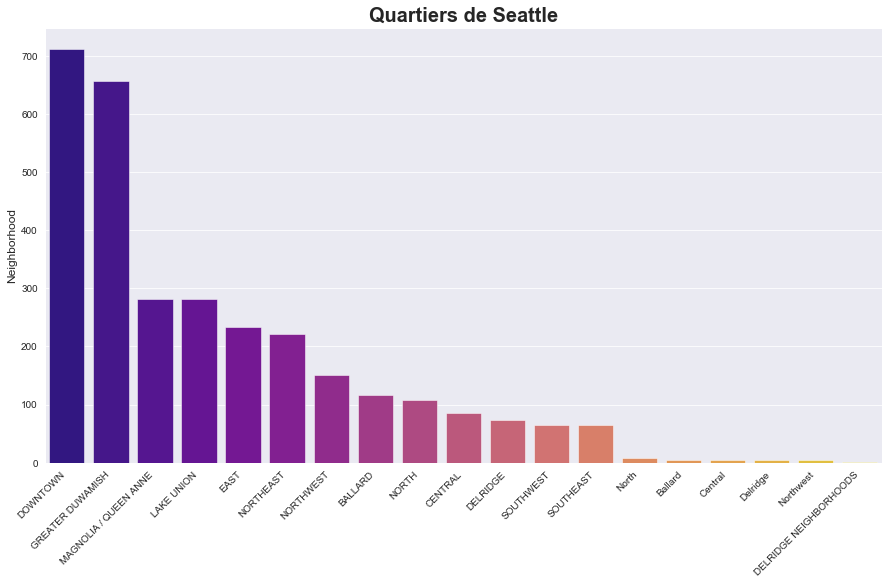

In [8]:
fig=plt.figure(figsize=(15,8))
plt.title("Quartiers de Seattle", weight = 'bold',size=20)
plt.xticks(rotation='45',ha='right')
sns.barplot(x=pd.DataFrame(df['Neighborhood'].value_counts()).index, y="Neighborhood", data=pd.DataFrame(df['Neighborhood'].value_counts()),palette = 'plasma')

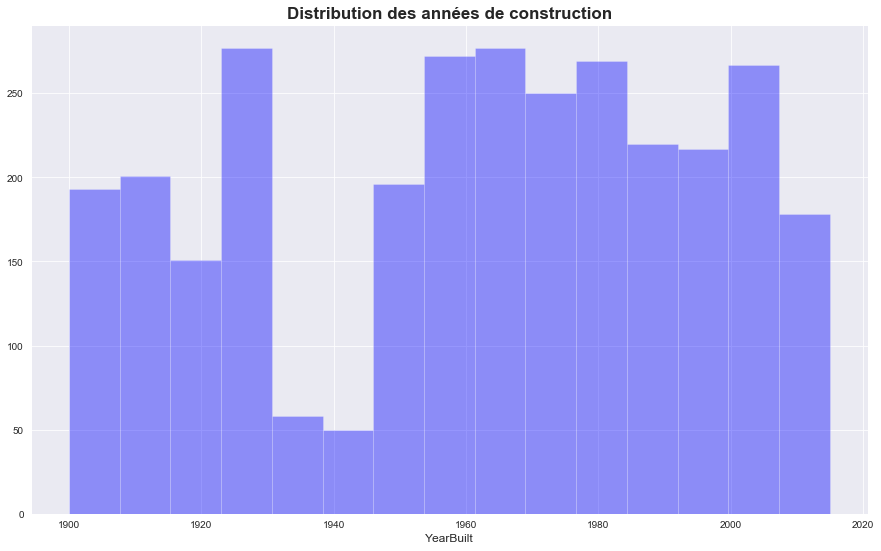

In [9]:
fig=plt.figure(figsize=(15,9))
plt.title("Distribution des années de construction", weight = 'bold',size=17)
sns.distplot(df['YearBuilt'], color='blue',kde=False)

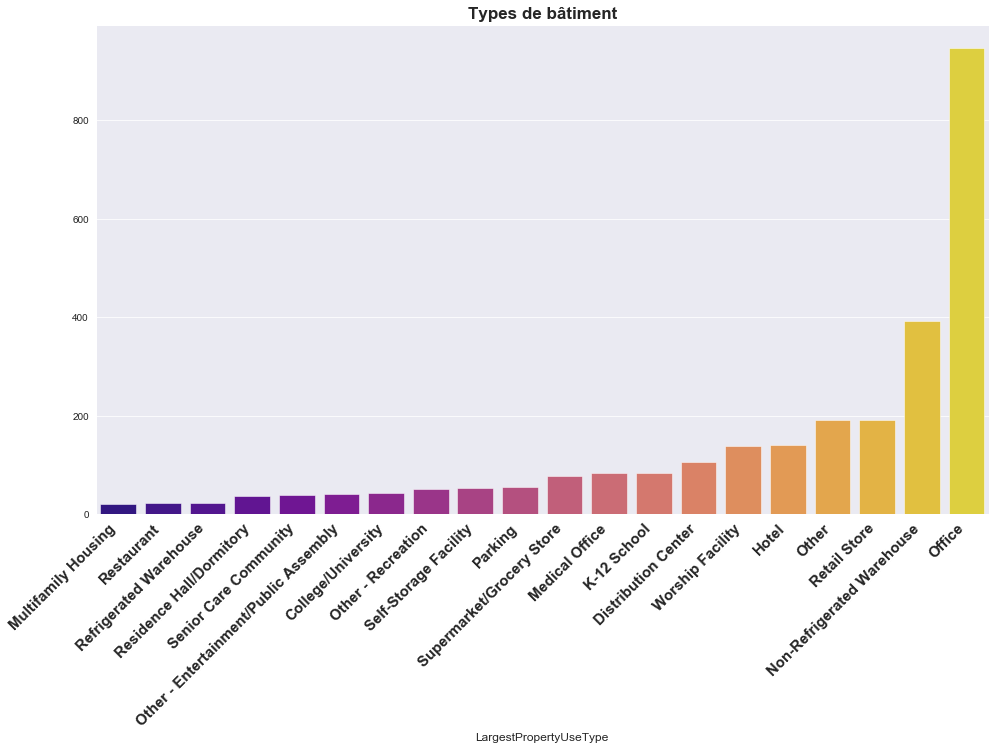

In [39]:
fig=plt.figure(figsize=(16,9))
plt.title("Types de bâtiment", weight = 'bold',size=17)
plt.xticks(rotation='45',ha='right', weight = 'bold', size = 15)
sns.barplot(x=df.groupby('LargestPropertyUseType').size().sort_values().tail(20).index, y=df.groupby('LargestPropertyUseType').size().sort_values().tail(20),palette = 'plasma')

### Recherche des colonnes avec des valeurs numériques

In [11]:
Col_non_num = [] # Colonnes contenant des données non numériques.

df_explore = df.iloc[:,:-2].dropna()
df_explore.reset_index(drop=True, inplace = True)

for i in df_explore.columns:
    if (type(df_explore[i][0]) != np.int64 and type(df_explore[i][0]) != np.float64 and type(df_explore[i][0]) != float):
             Col_non_num.append(i)

### Corrélation et Heatmap

In [12]:
ColonnesOk = df_explore.drop(Col_non_num,axis=1).columns
df_cor = df[ColonnesOk].drop(['DataYear','NumberofBuildings','OSEBuildingID'],axis=1)
tableau_cor = pd.DataFrame(columns=df_cor.columns,index=df_cor.columns) #tableau de corrélation

In [13]:
for i in tableau_cor.columns:
    L=[]
    for j in tableau_cor.columns:
        L.append(pearsonr(df_cor.dropna()[i],df_cor.dropna()[j])[0])
    tableau_cor[i]=L  

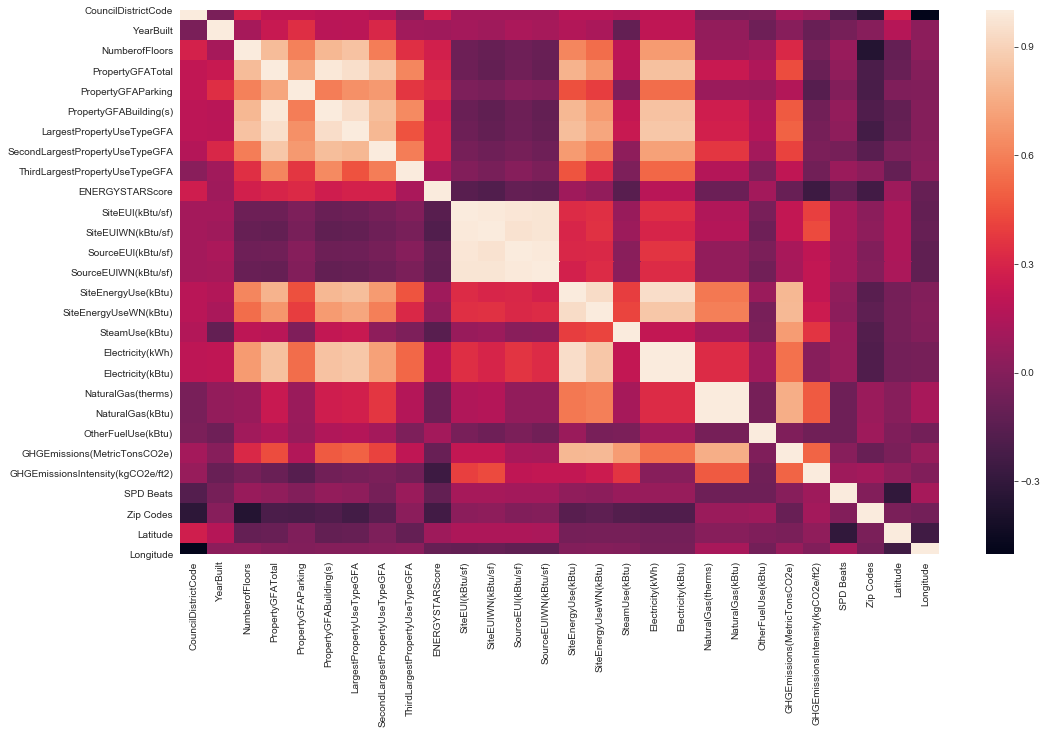

In [14]:
fig=plt.figure(figsize=(17,10))
sns.heatmap(tableau_cor)

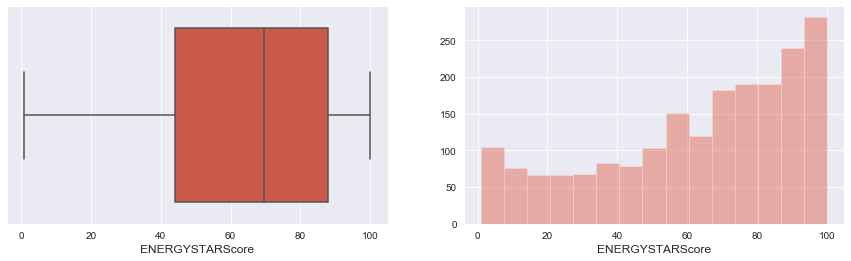

In [15]:
fig=plt.figure(figsize=(15,4))

plt.subplot(1, 2, 1)
sns.boxplot(df['ENERGYSTARScore'])

plt.subplot(1, 2, 2)
sns.distplot(df['ENERGYSTARScore'].dropna(), kde=False)

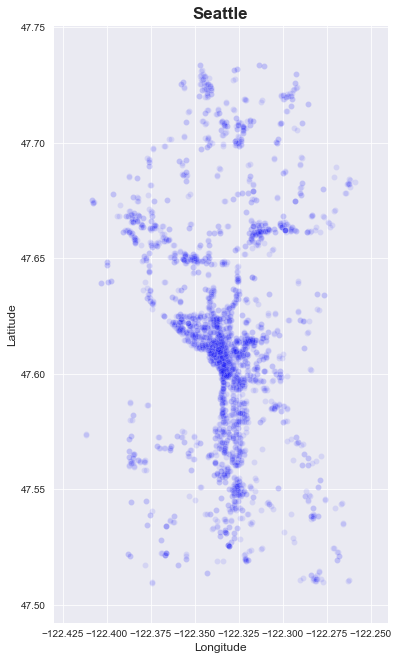

In [16]:
fig=plt.figure(figsize=(6,11))
plt.title("Seattle", weight = 'bold',size=17)
sns.scatterplot(x="Longitude", y="Latitude", data=df, alpha=0.09, color='b');

# Recherche les colonnes intéressantes pour la modélisation

On retire les variables de consommation d'énergie et d'émission.
C'est notamment celle-ci qu'on cherchera à prédire dans le notebook de modélisation suivant. On aura : 
- **Target 1** : GHGEmissions(MetricTonsCO2e)
- **Target 2** : SiteEnergyUse(kBtu)

In [17]:
# Target 1.
'GHGEmissions(MetricTonsCO2e)' # Emission de CO2.
target1_Emissions = df['GHGEmissions(MetricTonsCO2e)']

# Target 2.
'SiteEnergyUse(kBtu)' # Utilisation d'énergie du site considéré (en kBtu = British thermal unit), 1 kWh x 3.412 = 3.412 kBtu.
target2_EnergyUse = df['SiteEnergyUse(kBtu)']

In [18]:
# J'ai choisi de n'utiliser que 'PropertyGFATotal', il y a des variables parentes, c'est celle qui englobe le plus.
# Les colonnes suivantes contiennent des données quantitative et qualitatives, il va donc falloir faire une OHE des variables catégoriques.
ColonnesOK = ['OSEBuildingID','DataYear','BuildingType','PrimaryPropertyType','PropertyGFATotal','Neighborhood','YearBuilt','NumberofFloors','ENERGYSTARScore','Latitude',
                'Longitude','GHGEmissions(MetricTonsCO2e)','SiteEnergyUse(kBtu)']

In [19]:
df2 = df[ColonnesOK].dropna()
df2.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyGFATotal,Neighborhood,YearBuilt,NumberofFloors,ENERGYSTARScore,Latitude,Longitude,GHGEmissions(MetricTonsCO2e),SiteEnergyUse(kBtu)
0,1,2015,NonResidential,Hotel,88434,DOWNTOWN,1927,12.0,65.0,47.612190,-122.337997,249.43,6981428.0
1,2,2015,NonResidential,Hotel,103566,DOWNTOWN,1996,11.0,51.0,47.613106,-122.333358,263.51,8354235.0
2,3,2015,NonResidential,Hotel,961990,DOWNTOWN,1969,41.0,18.0,47.613349,-122.337699,2061.48,73130656.0


In [20]:
['PrimaryPropertyType','BuildingType','Neighborhood'] # Variables catégorielles qu'on souhaite Encoder

['PrimaryPropertyType', 'BuildingType', 'Neighborhood']

## One Hot Encoding

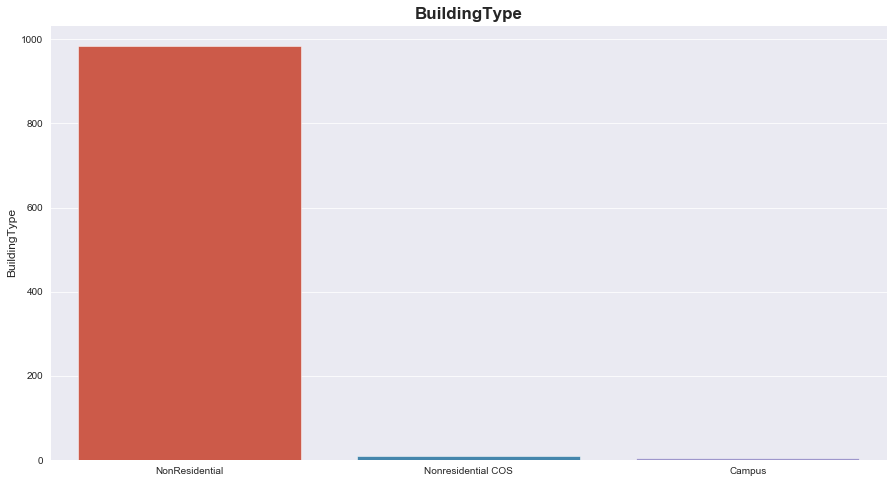

In [21]:
fig=plt.figure(figsize=(15,8))
plt.title("BuildingType", weight = 'bold',size=17)
sns.barplot(x=pd.DataFrame(df2['BuildingType'].value_counts()).index, y="BuildingType", data=pd.DataFrame(df2['BuildingType'].value_counts()))

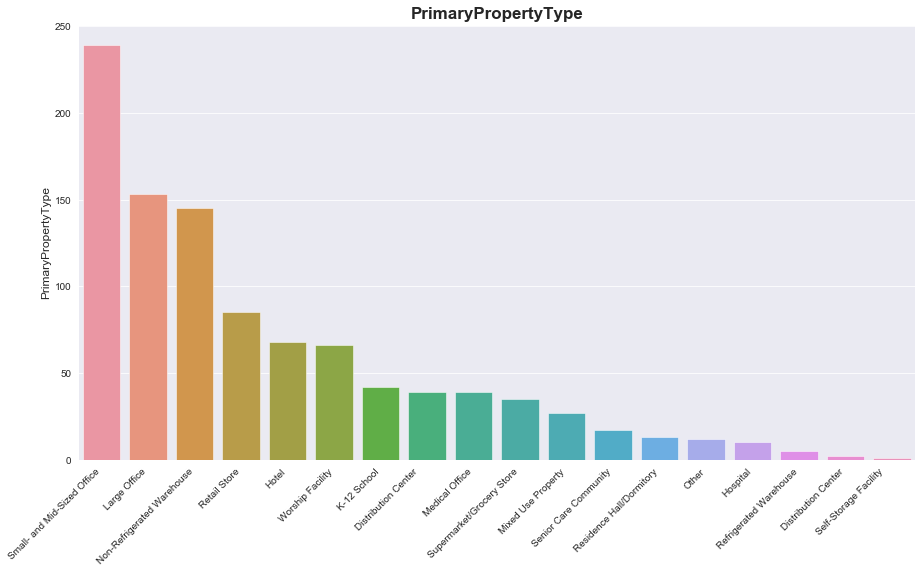

In [22]:
fig=plt.figure(figsize=(15,8))
plt.title("PrimaryPropertyType", weight = 'bold',size=17)
plt.xticks(rotation='45',ha='right')
sns.barplot(x=pd.DataFrame(df2['PrimaryPropertyType'].value_counts()).index, y='PrimaryPropertyType', data=pd.DataFrame(df2['PrimaryPropertyType'].value_counts()))

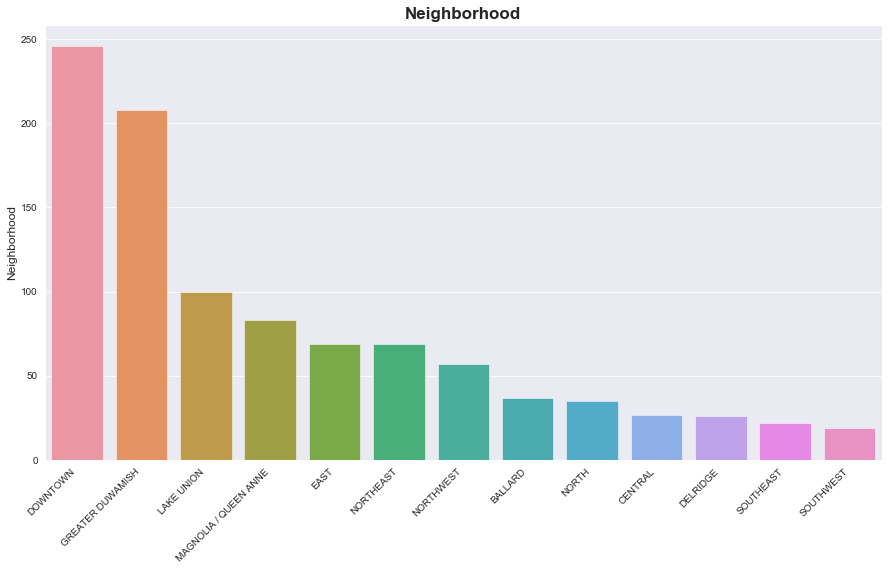

In [23]:
fig=plt.figure(figsize=(15,8))
plt.title('Neighborhood', weight = 'bold',size=17)
plt.xticks(rotation='45',ha='right')
sns.barplot(x=pd.DataFrame(df2['Neighborhood'].value_counts()).index, y='Neighborhood', data=pd.DataFrame(df2['Neighborhood'].value_counts()))

In [24]:
# Cette fonction retourne le nombre de fois d'apparition de b dans la colonne a du dataframe data.

def Count(data,a,b):
    mask = (data[a] == b)
    df_count = data[mask]
    return np.shape(df_count)[0]

In [25]:
df2 = df[ColonnesOK].dropna()

In [26]:
# a est la variable catégorielle considérée.
# Quand on a un taux de remplissage < 10%, on crée "Others" (une nouvelle classe).

df2.reset_index(inplace = True)

def FeatureCateg(dataframe,a):
    
    Dico={}
    L=[]
    uniques = dataframe[a].unique()
    others = 0 
    
    for i in uniques:
        if (Count(dataframe,a,i)>70):
            Dico[str(i)] = Count(dataframe,a,i)
        else:
            others += Count(dataframe,a,i)
            L.append(i)
            
    Dico['Others ' + a] = others
    Autres ='Others ' + a
    Dico = sorted(Dico.items(), key=lambda t: t[1], reverse=True)
    
    for k in range(0,len(Dico)):
        A=[]
        if (Dico[k][0] != Autres):
            for j in dataframe[a]:
                if(j == Dico[k][0]):
                    A.append(1)
                else:
                    A.append(0)
            dfo = pd.DataFrame(A)
            dfo.columns = [Dico[k][0]]
            dataframe = pd.concat([dataframe, dfo], axis=1)
        else :
            for l in dataframe[a]:
                if(l in L):
                    A.append(1)
                else:
                    A.append(0)          
            dfo = pd.DataFrame(A)
            dfo.columns = [Autres]
            dataframe = pd.concat([dataframe, dfo], axis=1)
       
    del dataframe[a]
    
    return dataframe

In [27]:
for i in ['PrimaryPropertyType','BuildingType','Neighborhood']:
    df2 = FeatureCateg(df2, i)
    
del df2['index']

In [41]:
# Check df2.

df2.head()

,OSEBuildingID,DataYear,PropertyGFATotal,YearBuilt,NumberofFloors,ENERGYSTARScore,Latitude,Longitude,GHGEmissions(MetricTonsCO2e),SiteEnergyUse(kBtu),Others PrimaryPropertyType,Small- and Mid-Sized Office,Large Office,Non-Refrigerated Warehouse,Retail Store,NonResidential,Others BuildingType,Others Neighborhood,DOWNTOWN,GREATER DUWAMISH,LAKE UNION,MAGNOLIA / QUEEN ANNE
0,1,2015,88434,1927,12.0,65.0,47.612190,-122.337997,249.43,6981428.0,1,0,0,0,0,1,0,0,1,0,0,0
1,2,2015,103566,1996,11.0,51.0,47.613106,-122.333358,263.51,8354235.0,1,0,0,0,0,1,0,0,1,0,0,0
2,3,2015,961990,1969,41.0,18.0,47.613349,-122.337699,2061.48,73130656.0,1,0,0,0,0,1,0,0,1,0,0,0
3,8,2015,119890,1980,18.0,67.0,47.613754,-122.340924,507.70,14829099.0,1,0,0,0,0,1,0,0,1,0,0,0
4,10,2015,83008,1926,11.0,25.0,47.614114,-122.332741,208.46,6252842.0,1,0,0,0,0,1,0,0,1,0,0,0


### Exportation

In [28]:
#df2.to_csv('df_clean.csv', sep = '\t')